In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading image from: /content/drive/Shareddrives/DSP Group 2/Notebook Datasets/Datasets/listen-task_sub-UTS01_ses-1_T1w.nii.gz


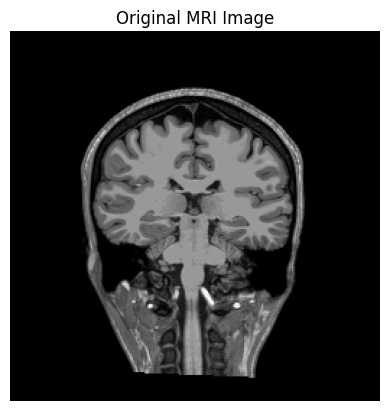

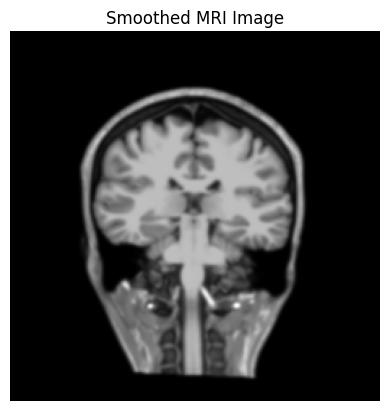

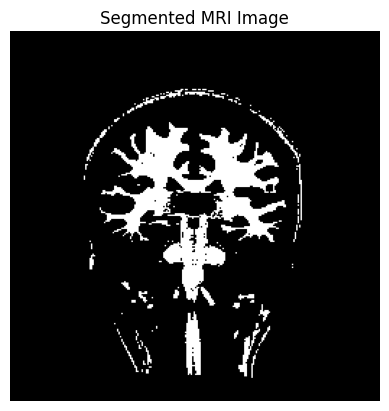

In [18]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

def load_image(file_path):
    try:
        print(f"Loading image from: {file_path}")
        image = sitk.ReadImage(file_path)
        return image
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

def display_image_slice(image, slice_number, title):
    # Get the 2D slice from the 3D volume
    slice_2d = sitk.GetArrayViewFromImage(image)[slice_number, :, :]
    plt.imshow(slice_2d, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def smooth_image(image, sigma=1.0):
    smoothed_image = sitk.SmoothingRecursiveGaussian(image, sigma)
    return smoothed_image

def segment_image(image):
    # Example: Threshold-based segmentation
    binary_image = sitk.BinaryThreshold(image, lowerThreshold=100, upperThreshold=500)
    return binary_image

def main():
    # Replace the existing file path with the desired one
    file_path = r'/content/drive/Shareddrives/DSP Group 2/Notebook Datasets/Datasets/listen-task_sub-UTS01_ses-1_T1w.nii.gz'
    # Load MRI image
    mri_image = load_image(file_path)

    if mri_image is not None:
        # Display a slice of the original image
        display_image_slice(mri_image, slice_number=100, title='Original MRI Image')

        # Smooth the image
        smoothed_image = smooth_image(mri_image)
        display_image_slice(smoothed_image, slice_number=100, title='Smoothed MRI Image')

        # Segment the image
        segmented_image = segment_image(mri_image)
        display_image_slice(segmented_image, slice_number=100, title='Segmented MRI Image')

if __name__ == "__main__":
    main()
